In [11]:



import cifar10
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




First step: What does this actually look like? Let's find out by evalutating this data with our great god plt.

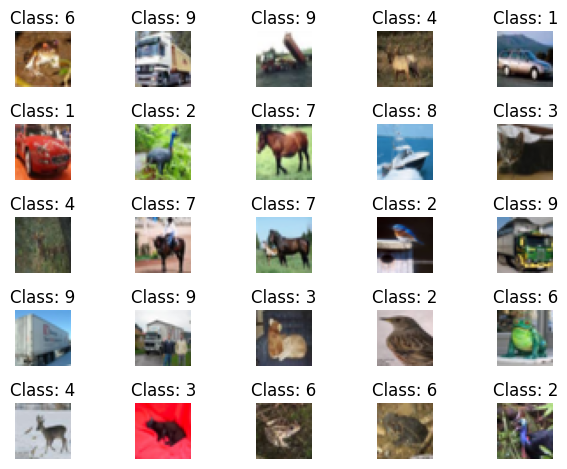

In [9]:
# Get the first 10 images and labels
images = []
labels = []
cols = 5
rows = 5
data_generator = cifar10.data_batch_generator()
for i, (data, label) in enumerate(data_generator):
  if i == cols*rows:
    break
  images.append(data)
  labels.append(label)

# Normalize the image data (assuming values between 0-255)
# images = [img / 255.0 for img in images]

# Create a 3x3 grid of subplots

fig, axs = plt.subplots(cols, rows)

# Plot the first 10 images
for i in range(cols):
  for j in range(rows):
    index = i * cols + j
    axs[i, j].imshow(images[index])
    axs[i, j].set_title(f"Class: {labels[index]}")
    axs[i, j].axis('off')  # Hide axes for cleaner visualization

# Make the plot visible
plt.tight_layout()
plt.show()

As you can see, the data is divided into ```10``` different classes with each class representing one of an ```"airplane, automobile (but not truck or pickup truck), bird, cat, deer, dog, frog, horse, ship, and truck (but not pickup truck)"```


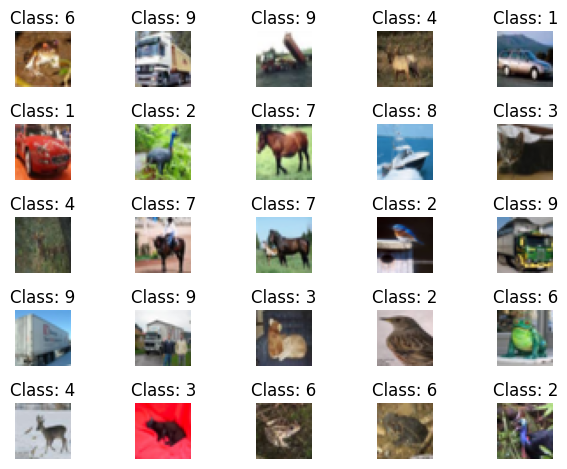

In [12]:
# Get the first 10 images and labels
images = []
labels = []
cols = 5
rows = 5
data_generator = cifar10.test_batch_generator()
for i, (data, label) in enumerate(data_generator):
  if i == cols*rows:
    break
  images.append(data)
  labels.append(label)

# Normalize the image data (assuming values between 0-255)
# images = [img / 255.0 for img in images]

# Create a 3x3 grid of subplots

fig, axs = plt.subplots(cols, rows)

# Plot the first 10 images
for i in range(cols):
  for j in range(rows):
    index = i * cols + j
    axs[i, j].imshow(images[index])
    axs[i, j].set_title(f"Class: {labels[index]}")
    axs[i, j].axis('off')  # Hide axes for cleaner visualization

# Make the plot visible
plt.tight_layout()
plt.show()

In [73]:
import os
import pickle

def load_batch(file_path):
    with open(file_path, 'rb') as file:
        data = pickle.load(file, encoding='bytes')
    print(f"pickle loaded type = {type(data[b'data'])}")
    return data[b'data'], data[b'labels']




cwd = os.getcwd(); 
cwd += '/cifar-10-batches-py'

# data_dir = cwd.join('/cifar-10-batches-py')

data_dir = cwd

train_files = ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']
test_file = 'test_batch'

label_count = {}


for file_name in train_files:
    file_path = os.path.join(data_dir, file_name)
    images, labels = load_batch(file_path)
    for label in labels:
        if label not in label_count:
            label_count[label] = 0
        label_count[label] += 1



print("Number of samples per class in training set:")
for label, count in sorted(label_count.items()):
    print(f"Class {label}: {count} samples")

total_train = sum(label_count.values())

print(f"\nTotal number of samples in training set: {sum(label_count.values())}")

label_count = {}



file_path = os.path.join(data_dir, test_file)
images, labels = load_batch(file_path)
for label in labels:
    if label not in label_count:
        label_count[label] = 0
    label_count[label] += 1

print("\nNumber of samples per class in test set:")
for label, count in sorted(label_count.items()):
    print(f"Class {label}: {count} samples")

total_test = sum(label_count.values())

print(f"\nTotal number of samples in test set: {sum(label_count.values())}")

print(f'% of set that is training vs testing: {total_train/(total_test + total_train)}')

pickle loaded type = <class 'numpy.ndarray'>
pickle loaded type = <class 'numpy.ndarray'>
pickle loaded type = <class 'numpy.ndarray'>
pickle loaded type = <class 'numpy.ndarray'>
pickle loaded type = <class 'numpy.ndarray'>
pickle loaded type = <class 'numpy.ndarray'>
pickle loaded type = <class 'numpy.ndarray'>
pickle loaded type = <class 'numpy.ndarray'>
pickle loaded type = <class 'numpy.ndarray'>
pickle loaded type = <class 'numpy.ndarray'>
all images shape = (153600000,)	all_labels shape = (50000,)
Number of samples per class in training set:
Class 0: 5000 samples
Class 1: 5000 samples
Class 2: 5000 samples
Class 3: 5000 samples
Class 4: 5000 samples
Class 5: 5000 samples
Class 6: 5000 samples
Class 7: 5000 samples
Class 8: 5000 samples
Class 9: 5000 samples

Total number of samples in training set: 50000
pickle loaded type = <class 'numpy.ndarray'>

Number of samples per class in test set:
Class 0: 1000 samples
Class 1: 1000 samples
Class 2: 1000 samples
Class 3: 1000 samples
Cl

In [75]:



# converting dataset for scikit use:


data_dir = 'cifar-10-batches-py'

def convert_to_numpy(data_dir): 
    """ 
    Returns the following into a numpy array:
    - training images (50_000, 3072)
    - training labels (50_000, )
    - testing images (10_000, 3072)
    - testing labels (10_000) 
    """
    train_files = ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']
    test_file = 'test_batch'



    # load training data
    train_images_list = []
    train_labels_list = []

    for file_name in train_files:
        file_path = os.path.join(data_dir, file_name)
        images, labels = load_batch(file_path)
        train_images_list.append(images)
        train_labels_list.append(labels)

    # concatenate all training data
    train_images = np.concatenate(train_images_list, axis=0)
    train_labels = np.concatenate(train_labels_list, axis=0)

    # load test data
    test_file_path = os.path.join(data_dir, test_file)
    test_images, test_labels = load_batch(test_file_path)

    # convert to numpy arrays
    train_images = np.array(train_images)
    train_labels = np.array(train_labels)
    test_images = np.array(test_images)
    test_labels = np.array(test_labels)

     
    return train_images, train_labels, test_images, test_labels


In [76]:
train_imgs, train_labels, test_images, test_labels = convert_to_numpy(data_dir)
print(train_imgs.shape)

pickle loaded type = <class 'numpy.ndarray'>
pickle loaded type = <class 'numpy.ndarray'>
pickle loaded type = <class 'numpy.ndarray'>
pickle loaded type = <class 'numpy.ndarray'>
pickle loaded type = <class 'numpy.ndarray'>
pickle loaded type = <class 'numpy.ndarray'>
(50000, 3072)


KeyboardInterrupt: 

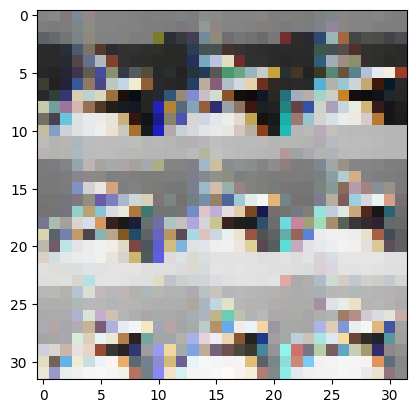

In [79]:
# first_amt_non_flat = 25
# first_non_flat = train_imgs[:first_amt_non_flat]
import time
# rows, cols = 4, 4
# image_index = 0
# fig, axes = plt.subplots(rows, cols, figsize=(8, 8))
# img_index = 0
# for i in range(rows):
#   for j in range(cols):
#     image = train_imgs[img_index].reshape(32, 32, 3)

#     print(image.shape)
#     axes[i, j].imshow(image)
for i in range(1000):

  plt.plot(train_images)
  plt.imshow(train_imgs[i].reshape(32,32,3))
  # time.sleep(2)

In [60]:
def load_batch_flattened(file_path):
  """Loads a batch of CIFAR-10 data from a pickle file, converts to NumPy format, and flattens images.

  Args:
      file_path: Path to the pickle file containing the data.

  Returns:
      A tuple of (images, labels):
          - images: A NumPy array containing the flattened images (shape: [num_images, 32 * 32 * 3]).
          - labels: A NumPy array containing the labels (shape: [num_images]).
  """

  with open(file_path, 'rb') as file:
    data = pickle.load(file, encoding='bytes')
  images = data[b'data'].reshape(-1, 32 * 32 * 3)  # Reshape and flatten
  labels = np.array(data[b'labels'])
  return images, labels



def load_batch_not_flattened(file_path):
  """Loads a batch of CIFAR-10 data from a pickle file and converts to NumPy format (not flattened).

  Args:
      file_path: Path to the pickle file containing the data.

  Returns:
      A tuple of (images, labels):
          - images: A NumPy array containing the images (shape: [num_images, 32, 32, 3]).
          - labels: A NumPy array containing the labels (shape: [num_images]).
  """

  with open(file_path, 'rb') as file:
    data = pickle.load(file, encoding='bytes')
  images = data[b'data'].reshape(1, 32, 32, 3) # Reshape for channels-last
  labels = np.array(data[b'labels'])
  return images, labels

# ... rest of the code (with modifications)

cwd = os.getcwd();
cwd += '/cifar-10-batches-py'
data_dir = cwd

train_files = ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']
test_file = 'test_batch'

# ... (rest of the code)

def load_cifar10_flattened(data_dir):
  """Loads the CIFAR-10 dataset and converts it to NumPy format.

  Args:
      data_dir: Path to the directory containing the CIFAR-10 data files.

  Returns:
      A tuple of (train_images, train_labels, test_images, test_labels):
          - train_images: A NumPy array containing the training images.
          - train_labels: A NumPy array containing the training labels.
          - test_images: A NumPy array containing the test images.
          - test_labels: A NumPy array containing the test labels.
  """

  train_images, train_labels = [], []
  for file_name in train_files:
    file_path = os.path.join(data_dir, file_name)
    images, labels = load_batch_flattened(file_path)
    train_images.append(images)
    train_labels.append(labels)
  train_images = np.concatenate(train_images)
  train_labels = np.concatenate(train_labels)

  test_file_path = os.path.join(data_dir, test_file)
  test_images, test_labels = load_batch_flattened(test_file_path)

  return train_images, train_labels, test_images, test_labels

def load_cifar10_not_flattened(data_dir):
  """Loads the CIFAR-10 dataset and converts it to NumPy format.

  Args:
      data_dir: Path to the directory containing the CIFAR-10 data files.

  Returns:
      A tuple of (train_images, train_labels, test_images, test_labels):
          - train_images: A NumPy array containing the training images.
          - train_labels: A NumPy array containing the training labels.
          - test_images: A NumPy array containing the test images.
          - test_labels: A NumPy array containing the test labels.
  """

  train_images, train_labels = [], []
  for file_name in train_files:
    file_path = os.path.join(data_dir, file_name)
    images, labels = load_batch_not_flattened(file_path)
    train_images.append(images)
    train_labels.append(labels)
  train_images = np.concatenate(train_images)
  train_labels = np.concatenate(train_labels)

  test_file_path = os.path.join(data_dir, test_file)
  test_images, test_labels = load_batch_not_flattened(test_file_path)

  return train_images, train_labels, test_images, test_labels

# Load data with non-flattened images
train_images_flattened, train_labels_flattened, test_images_flattened, test_labels_flattened = load_cifar10_flattened(data_dir) 
train_images_not_flattened, train_labels_not_flattened, test_images_not_flattened, test_labels_not_flattened = load_cifar10_not_flattened(data_dir) 

# Load data with flattened images



# Now you can work with the data in NumPy arrays
print("Training images flattened shape:", train_images_flattened.shape, end="\t")
print("Training labels flattned shape:", train_labels_flattened.shape)
print(f'Train images type = {type(train_images_not_flattened)}')
print("Training images unflattened shape:", train_images_not_flattened.shape, end="\t")

print("Training labels unflattned shape:", train_labels_not_flattened.shape)


ValueError: cannot reshape array of size 30720000 into shape (1,32,32,3)

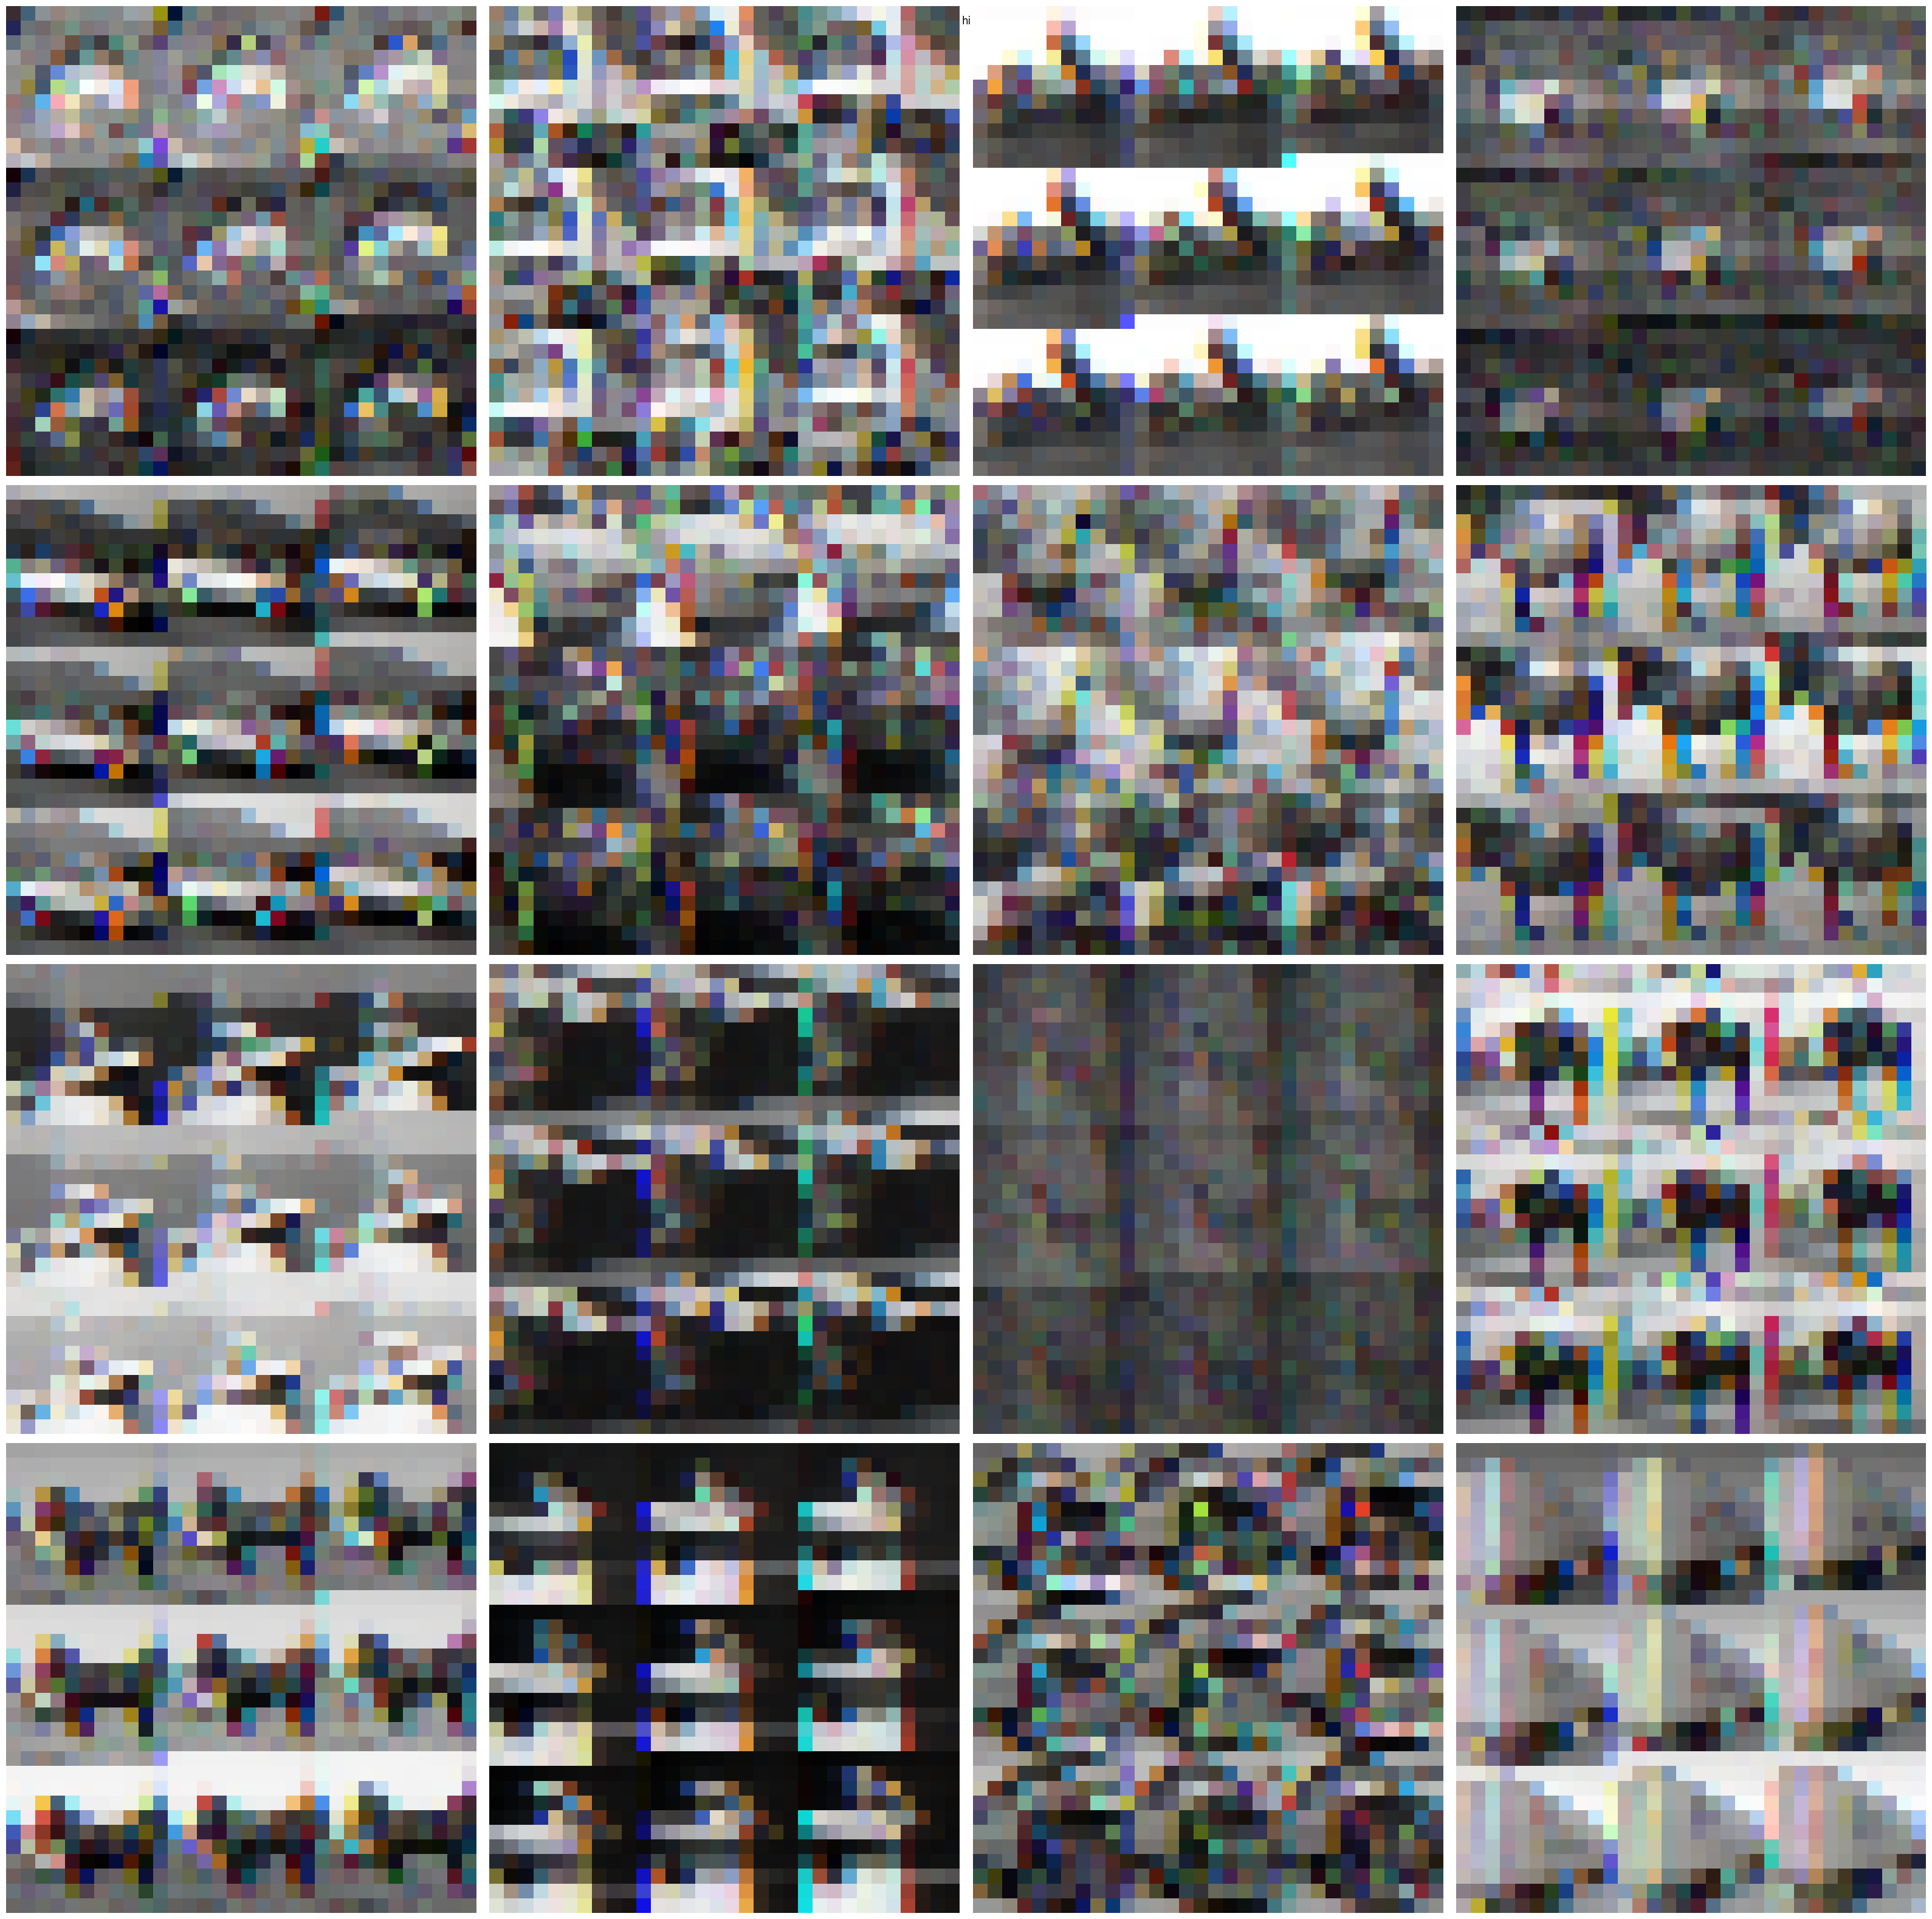

(3072,)


TypeError: Invalid shape (3072,) for image data

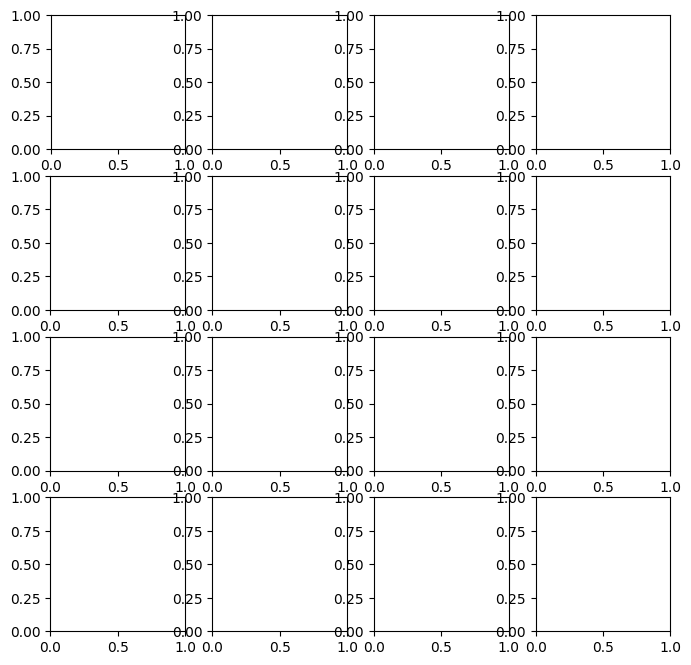

In [56]:

def show_images(images, title):
  """Displays a grid of images in a 4x4 subplot.

  Args:
      images: A NumPy array of images (shape: [num_images, width, height, channels] for non-flattened or [num_images, width * height * channels] for flattened).
      title: Title for the subplot.
  """

  # Ensure at most 16 images are displayed (assuming 4x4 grid)
  images = images[:16]

  # Reshape for a 4x4 grid (assuming you have enough images)
  rows, cols = 4, 4
  image_index = 0
  fig, axes = plt.subplots(rows, cols, figsize=(32, 32))

  # Iterate over images and axes, plotting each image
  for i in range(rows):
    for j in range(cols):
      if image_index >= len(images):
        break
      image = images[image_index]

      # Reshape flattened image back to original dimensions if necessary
      if len(image.shape) == 1:
        image = image.reshape(32, 32, 3)  # Assuming original shape (channels-last)

      axes[i, j].imshow(image)
      axes[i, j].axis('off')  # Hide axes for cleaner visualization
      image_index += 1

  # Add title and adjust layout
  fig.suptitle(title, fontsize=12)
  plt.tight_layout()
  plt.show()

show_images(train_images_flattened, "hi")
first_amt_non_flat = 25
first_non_flat = train_images_not_flattened[:first_amt_non_flat]

rows, cols = 4, 4
image_index = 0
fig, axes = plt.subplots(rows, cols, figsize=(8, 8))
img_index = 0
for i in range(rows):
  for j in range(cols):
    # image = train_images_flattened[img_index].reshape(32, 32, 3)
    image = train_images_not_flattened[img_index]

    print(image.shape)
    axes[i, j].imshow(image)

Shape of each image: (32, 32, 3)


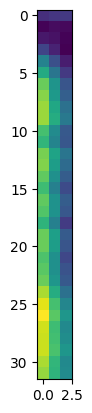

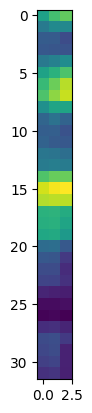

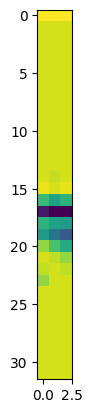

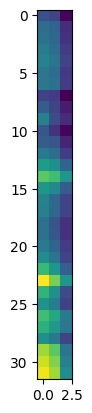

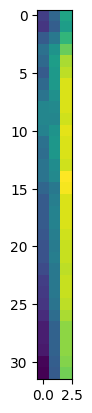

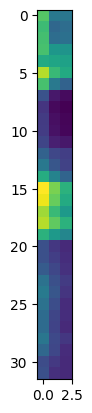

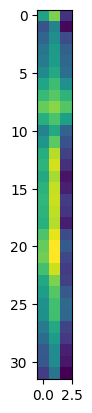

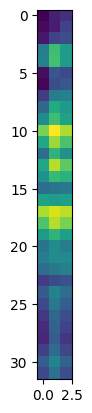

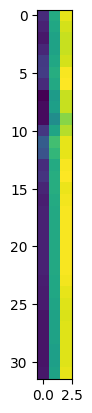

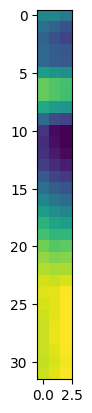

In [83]:

import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Get the first 10 images
first_10_images = X_train[:10]

# Print information about the images (optional)
print("Shape of each image:", first_10_images.shape[1:])# Function to plot an image (replace with your visualization logic)
def plot_image(image):
  plt.imshow(image[0])  # Assuming first channel is for grayscale
  plt.show()

# Plot the first 10 images (modify plot_image function for color images)
for image in first_10_images:
  plot_image(image)

In [84]:
import os
import numpy as np
import pickle

def load_batch(file_path):
    with open(file_path, 'rb') as file:
        data = pickle.load(file, encoding='bytes')
    return data[b'data'], data[b'labels']

cwd = os.getcwd(); 
cwd += '/cifar-10-batches-py'

# data_dir = cwd.join('/cifar-10-batches-py')

data_dir = cwd
train_files = ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']
test_file = 'test_batch'

label_count = {}

for file_name in train_files:
    file_path = os.path.join(data_dir, file_name)
    images, labels = load_batch(file_path)
    for label in labels:
        if label not in label_count:
            label_count[label] = 0
        label_count[label] += 1

print("Number of samples per class in training set:")
for label, count in label_count.items():
    print(f"Class {label}: {count} samples")

print(f"\nTotal number of samples in training set: {sum(label_count.values())}")

label_count = {}

file_path = os.path.join(data_dir, test_file)
images, labels = load_batch(file_path)
for label in labels:
    if label not in label_count:
        label_count[label] = 0
    label_count[label] += 1

print("\nNumber of samples per class in test set:")
for label, count in label_count.items():
    print(f"Class {label}: {count} samples")

print(f"\nTotal number of samples in test set: {sum(label_count.values())}")

Number of samples per class in training set:
Class 6: 5000 samples
Class 9: 5000 samples
Class 4: 5000 samples
Class 1: 5000 samples
Class 2: 5000 samples
Class 7: 5000 samples
Class 8: 5000 samples
Class 3: 5000 samples
Class 5: 5000 samples
Class 0: 5000 samples

Total number of samples in training set: 50000

Number of samples per class in test set:
Class 3: 1000 samples
Class 8: 1000 samples
Class 0: 1000 samples
Class 6: 1000 samples
Class 1: 1000 samples
Class 9: 1000 samples
Class 5: 1000 samples
Class 7: 1000 samples
Class 4: 1000 samples
Class 2: 1000 samples

Total number of samples in test set: 10000


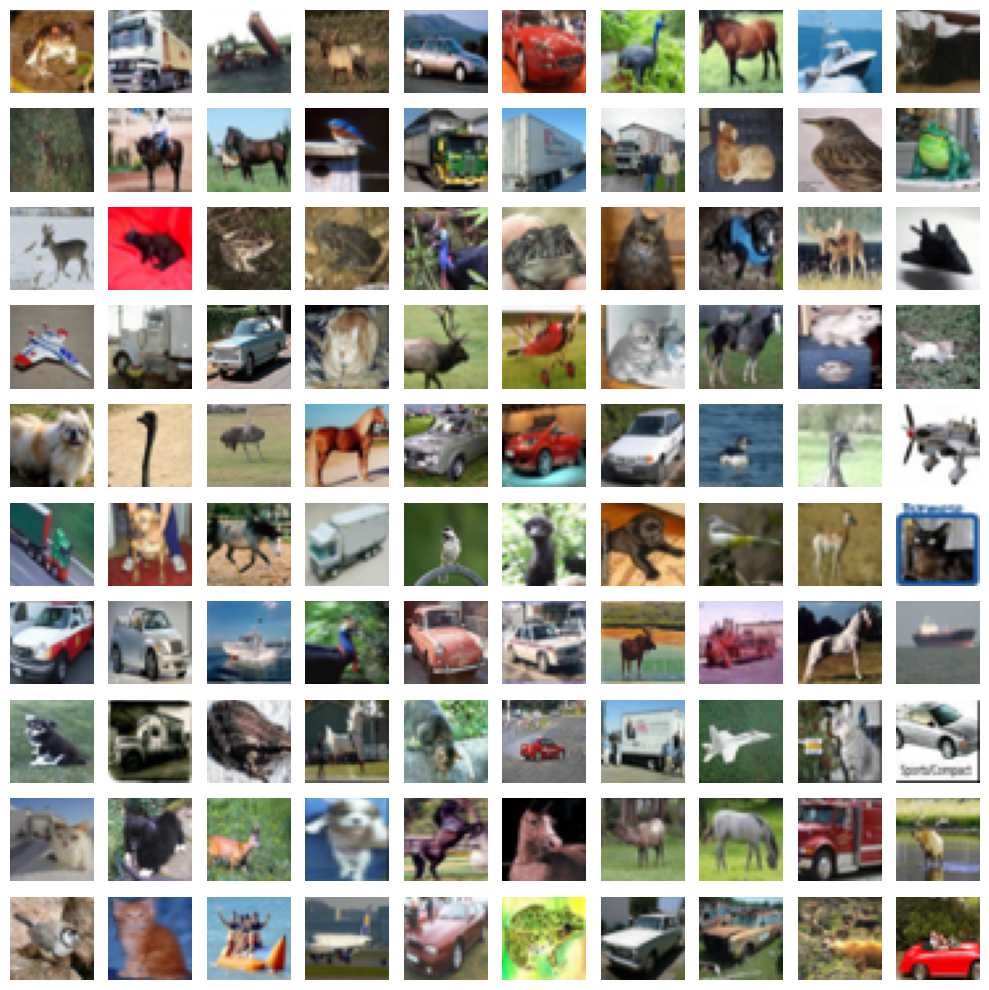

In [104]:
def show_images(images, num_images=25):
    cols, rows = int(math.sqrt(num_images)), int(math.sqrt(num_images))
    images = images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1) 
    fig, axes = plt.subplots(ncols=cols, nrows=rows, figsize=(10, 10))
    img_ctr = 0; 
    for i in range(cols):
        for j in range(rows):
            
            axes[i,j].imshow(images[img_ctr])
            axes[i, j].axis('off')
            img_ctr += 1

    plt.tight_layout();
    plt.show()
    


show_images(train_imgs, 100)